## Import Data

In [59]:
%matplotlib notebook
import locale
from locale import atof
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.finance as fin
import matplotlib.ticker as mticker
import datetime as dt

locale.setlocale(locale.LC_NUMERIC, '')

BTC_df = pd.read_csv("BitcoinHistoricalData_coinmarketcap.csv", sep = '\t', thousands=',')
ETH_df = pd.read_csv("EthereumHistoricalData_coinmarketcap.csv", sep = '\t', thousands=',')
BC_Events_df = pd.read_csv("BlockchainEvents_2016_May.csv", sep = '\t', thousands=',')

BTC_df['Date'] = pd.to_datetime(BTC_df['Date'])
BTC_df['Date'] = BTC_df['Date'].dt.date
BTC_df.set_index(['Date'],inplace=True)
BTC_df.sort_index(inplace=True)
BTC_df['Volume'] = BTC_df['Volume'].replace('-', np.NaN)
BTC_df.dropna(inplace=True)
BTC_df['Volume'] = BTC_df['Volume'].apply(atof)
BTC_df['Volume'] = BTC_df['Volume'].astype(int)

BC_Events_df['Date'] = pd.to_datetime(BC_Events_df['Date'])

ETH_df['Date'] = pd.to_datetime(ETH_df['Date'])
ETH_df['Date'] = ETH_df['Date'].dt.date
ETH_df.set_index(['Date'], inplace=True)
ETH_df.sort_index(inplace=True)
ETH_df['Market Cap'] = ETH_df['Market Cap'].replace('-', np.NaN)
ETH_df.dropna(inplace=True)
ETH_df['Market Cap'] = ETH_df['Market Cap'].apply(atof)

In [60]:
#ETH_df

## PLOTTING

In [61]:
#BTC_df.plot(y=['Volume', 'Market Cap'], figsize=(10,5))

In [62]:
#ETH_df.plot(y=['Volume', 'Market Cap'], figsize=(10,5))

In [63]:
start_dt = '2016-10-01'
end_dt = '2017-10-01'
start_date = pd.to_datetime(start_dt).date()
end_date = pd.to_datetime(end_dt).date()
BTC_df = BTC_df[(BTC_df.index >= start_date) & (BTC_df.index <= end_date)]
ETH_df = ETH_df[(ETH_df.index >= start_date) & (ETH_df.index <= end_date)]

Dates = np.arange(pd.to_datetime(start_date), pd.to_datetime(end_date)+ pd.DateOffset(1), dtype='datetime64[D]')
BTC_Dates = np.arange(min(BTC_df.index) - pd.DateOffset(1), max(BTC_df.index), dtype='datetime64[D]')
ETH_Dates = np.arange(min(ETH_df.index) - pd.DateOffset(1), max(ETH_df.index), dtype='datetime64[D]')

<IPython.core.display.Javascript object>


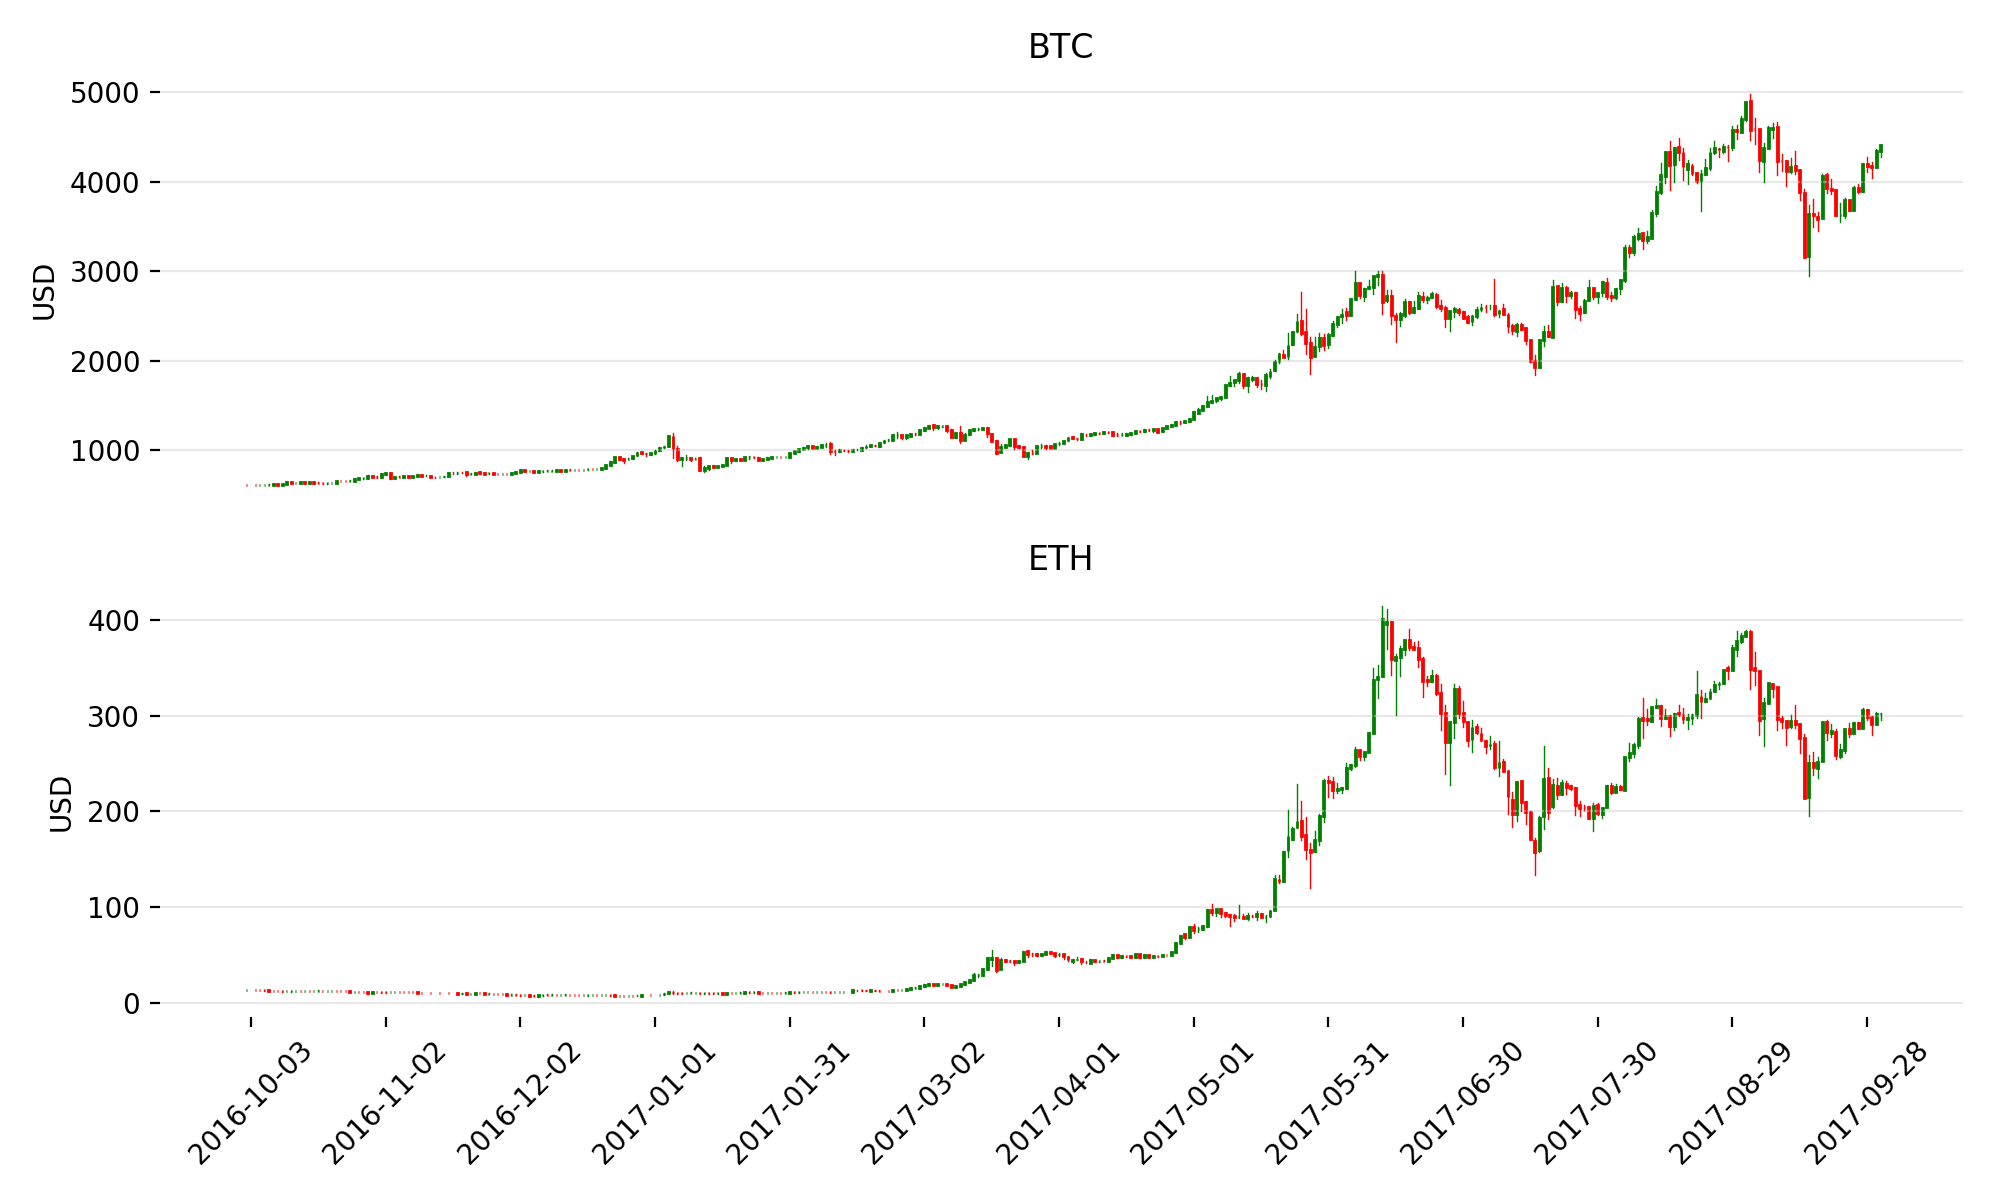

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,6))

ohlc1 = [(mdates.date2num(ind), x['Open'], x['High'], x['Low'], x['Close'], x['Volume']) for ind, x in BTC_df.iterrows()]
ohlc2 = [(mdates.date2num(ind), x['Open'], x['High'], x['Low'], x['Close'], x['Volume']) for ind, x in ETH_df.iterrows()]

fin.candlestick_ohlc(ax1, ohlc1, width=0.2, colorup='g', colordown='r', alpha=1.0)
fin.candlestick_ohlc(ax2, ohlc2, width=0.2, colorup='g', colordown='r', alpha=1.0)

for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5) 
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mticker.MaxNLocator(15))
ax1.set_ylabel('USD', color='k')
ax2.set_ylabel('USD', color='k')
ax1.set_title('BTC')
ax2.set_title('ETH')
ax1.xaxis.set_ticks_position('none') 
fig.tight_layout()

<IPython.core.display.Javascript object>


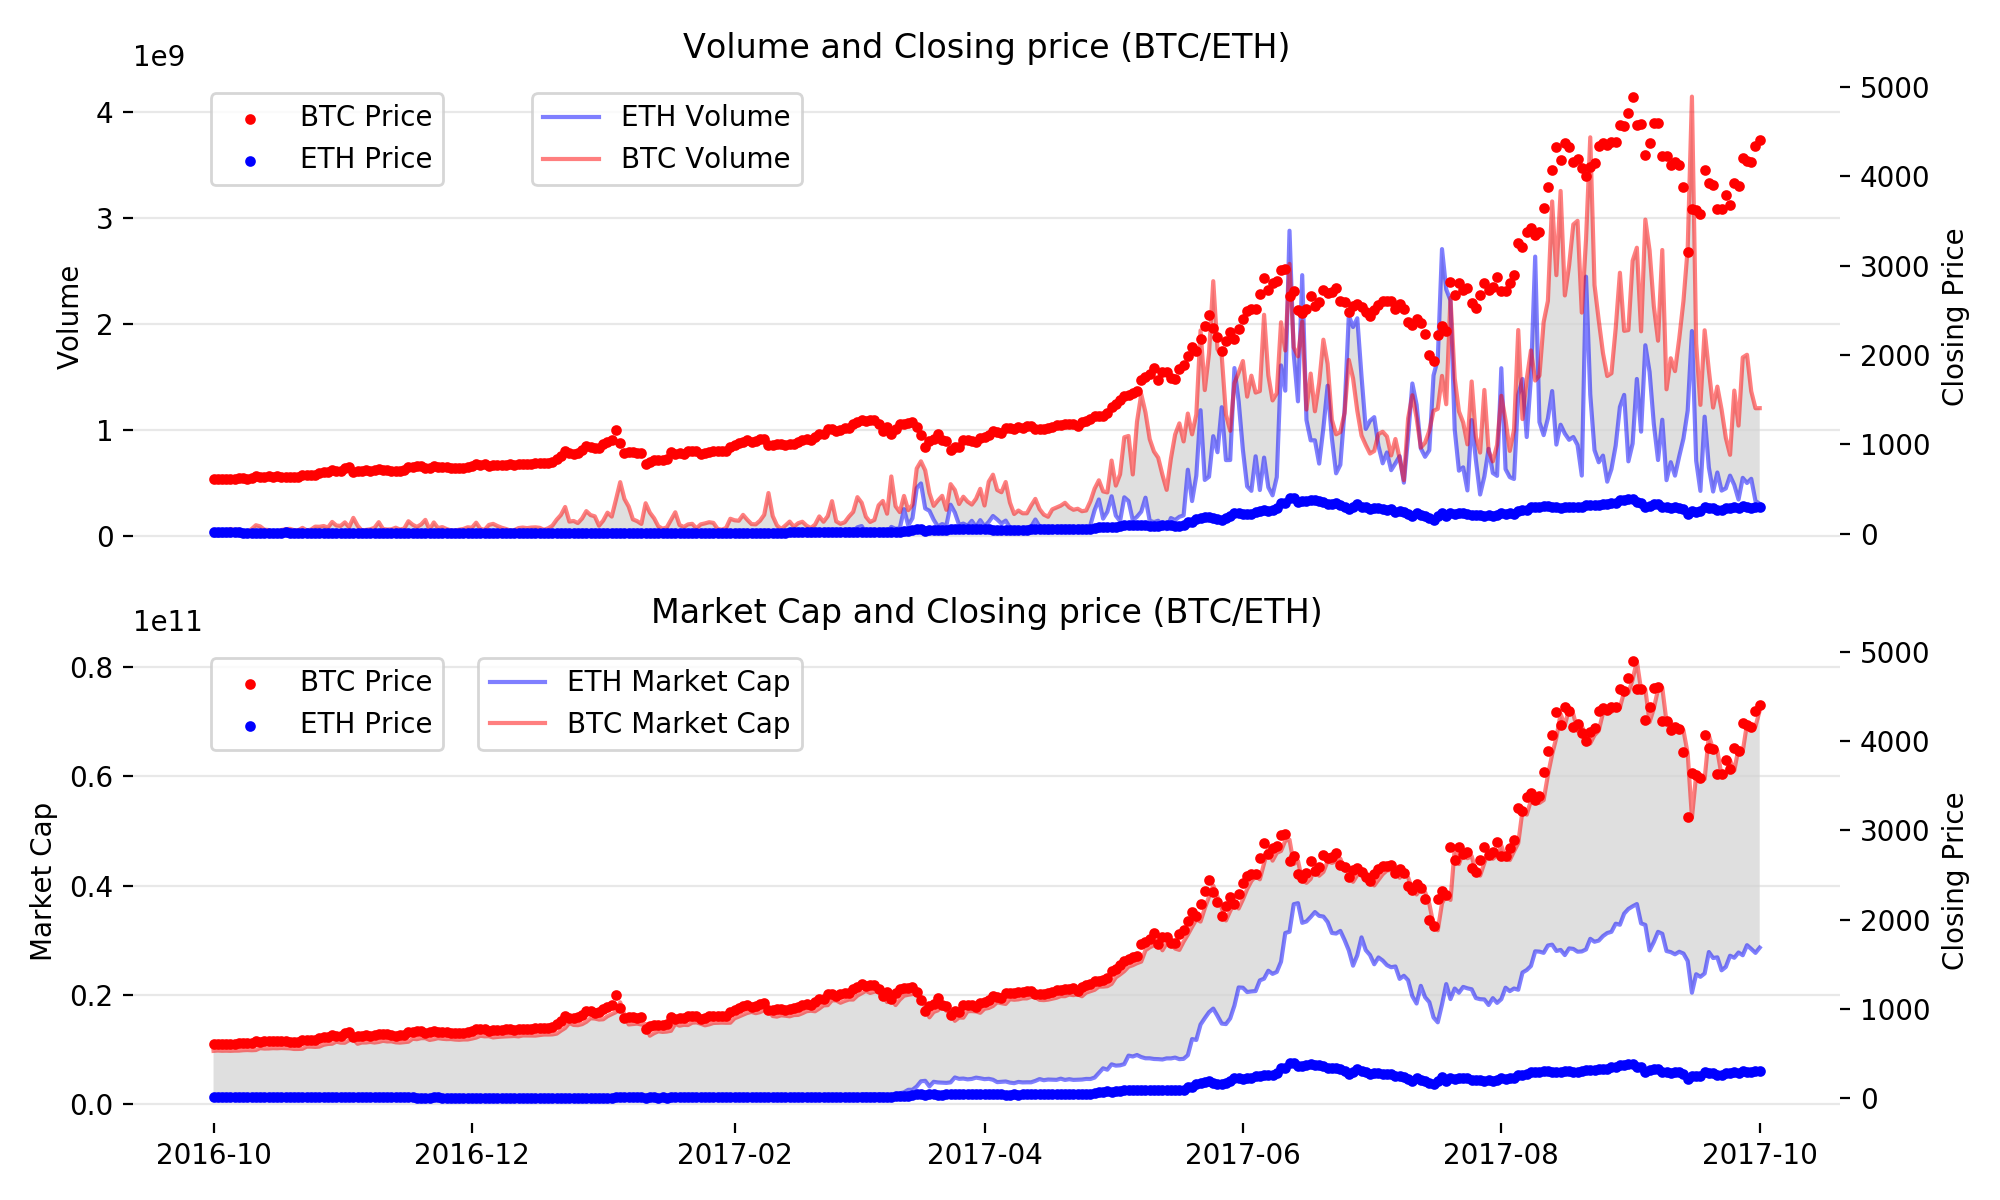

In [67]:
fig, (ax1, ax3) = plt.subplots(2, 1, sharex = True, figsize=(10,6))
ax2 = ax1.twinx()
ax4 = ax3.twinx()

x = Dates
#x = list(map(pd.to_datetime, Dates))
#x = [dt.datetime.strptime(str(d),'%Y-%m-%d 00:00:00') for d in x]

#x1 = list(map(pd.to_datetime, BTC_Dates))
#x1 = [dt.datetime.strptime(str(d),'%Y-%m-%d 00:00:00') for d in x1]

#x2 = list(map(pd.to_datetime, ETH_Dates))
#x2 = [dt.datetime.strptime(str(d),'%Y-%m-%d 00:00:00') for d in x2]

y1 = BTC_df['Volume']
y2 = BTC_df['Market Cap']
y0 = BTC_df['Close']

y3 = ETH_df['Volume']
y4 = ETH_df['Market Cap']
y5 = ETH_df['Close']

#line1, = ax1.plot(x,y1, 'b', alpha =0.5)
line2, = ax1.plot(x,y3, 'b', alpha =0.5, label='ETH Volume')
line0, = ax1.plot(x,y1, 'r', alpha =0.5, label='BTC Volume')
ax2.scatter(x, y0, color='r', s=8, label='BTC Price')
ax2.scatter(x, y5, color='b', s=8, label='ETH Price')

#line3, = ax3.plot(x,y3, 'b', alpha =0.75)
line4, = ax3.plot(x,y4, 'b', alpha =0.5, label='ETH Market Cap')
line5, = ax3.plot(x,y2, 'r', alpha =0.5, label='BTC Market Cap')
ax4.scatter(x, y0, color='r', s=8, label='BTC Price')
ax4.scatter(x, y5, color='b', s=8, label='ETH Price')

ax1.fill_between(x, y3, y1, facecolor='grey', alpha=0.25)
ax3.fill_between(x, y2, y4, facecolor='grey', alpha=0.25)

ax1.set_ylabel('Volume', color='k')
ax2.set_ylabel('Closing Price', color='k')
ax3.set_ylabel('Market Cap', color='k')
ax4.set_ylabel('Closing Price', color='k')
ax1.set_title('Volume and Closing price (BTC/ETH)')
ax3.set_title('Market Cap and Closing price (BTC/ETH)')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.yaxis.grid(color='k', which='major', linestyle='--', linewidth=.5)
    #ax.yaxis.grid(True, which='major')
    if ax == ax2 or ax == ax4:
        ax.legend(loc='upper right', bbox_to_anchor=(0.19, 0.99))
    else:
        ax.legend(loc='upper right', bbox_to_anchor=(0.4, 0.99))

        ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax3.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

fig.tight_layout()
#for d in BC_Events_df['Date']:
    #ax1.axvline(x=d, color='k')
    #plt.text()

## ML modeling

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

## BITCOIN CLOSING PRICE
X = BTC_df[['Volume', 'Open', 'High', 'Low']].copy()
#X = BTC_df[['Volume', 'Market Cap']]
#y = BTC_df['Open']
y = BTC_df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Dummy Regression
#dr = DummyRegressor().fit(X_train, y_train)
#print ('Dummy Regression: ', 'Train: ', r2_score(y_train, dr.predict(X_train)))
#print ('Test: ', r2_score(y_test, dr.predict(X_test)))
#Logistic Regression
lrc = LinearRegression().fit(X_train, y_train)
print ('Linear Regression (BTC):')
print ('\tTrain (r2_score): ', r2_score(y_train, lrc.predict(X_train)))
print ('\tTest (r2_score): ', r2_score(y_test, lrc.predict(X_test)))
#print ('\tTrain (explained_variance_score): ', explained_variance_score(y_train, lrc.predict(X_train)))
#print ('\tTest (explained_variance_score): ', explained_variance_score(y_test, lrc.predict(X_test)))
#Random Forest Regression
rfr = RandomForestRegressor(n_estimators = 300, max_depth=15, random_state=0).fit(X_train, y_train)
print ('Random Forest Regression (BTC): ')
print('\tTrain (r2 score): ', r2_score(y_train, rfr.predict(X_train)))
print('\tTest (r2 score): ', r2_score(y_test, rfr.predict(X_test)))

### ETHEREUM PRICE
#X_ETH = ETH_df[['Volume', 'Market Cap', 'Open', 'High', 'Low']].copy()
ETH_df['Avg Price'] = (ETH_df['High']+ETH_df['Low'])/2
ETH_df['Nodes'] = ETH_df['Market Cap']/ETH_df['Avg Price']
X_ETH = ETH_df[['Volume', 'Market Cap']]
#X_ETH = ETH_df[['Volume', 'Nodes']]
y_ETH = ETH_df['Close']
X_ETH_train, X_ETH_test, y_ETH_train, y_ETH_test = train_test_split(X_ETH, y_ETH, random_state=0)
#Dummy Regression
#dr2 = DummyRegressor().fit(X_ETH_train, y_ETH_train)
#print ('Dummy Regression: ', 'Train: ', r2_score(y_ETH_train, dr2.predict(X_ETH_train)))
#print ('Test: ', r2_score(y_ETH_test, dr2.predict(X_ETH_test)))
#Logistic Regression
lrc2 = LinearRegression().fit(X_ETH_train, y_ETH_train)
print ('Linear Regression (ETH): ')
print('\tTrain (r2 score): ', r2_score(y_ETH_train, lrc2.predict(X_ETH_train)))
print ('\tTest (r2 score): ', r2_score(y_ETH_test, lrc2.predict(X_ETH_test)))
#Random Forest Regression
rfr2 = RandomForestRegressor(n_estimators = 50, max_depth=10, random_state=0).fit(X_ETH_train, y_ETH_train)
print ('Random Forest Regression (ETH): ')
print('\tTrain (r2 score): ', r2_score(y_ETH_train, rfr2.predict(X_ETH_train)))
print ('\tTest (r2 score): ', r2_score(y_ETH_test, rfr2.predict(X_ETH_test)))

Linear Regression (BTC):
	Train (r2_score):  0.998642174557
	Test (r2_score):  0.999332061232
Random Forest Regression (BTC): 
	Train (r2 score):  0.999485208655
	Test (r2 score):  0.998099444534
Linear Regression (ETH): 
	Train (r2 score):  0.991134000114
	Test (r2 score):  0.992684592808
Random Forest Regression (ETH): 
	Train (r2 score):  0.998123946486
	Test (r2 score):  0.989338215322


In [55]:
cur_BTC = [[2401840000, 6006.00, 6075.59, 5732.47]]
lrc.predict(cur_BTC)

array([ 5857.06607575])

In [56]:
cur_ETH = [[482336000, 28111400000]]
lrc2.predict(cur_ETH)

array([ 296.0098043])

In [57]:
#explained_variance_score([5930.32], lrc.predict(cur_BTC))
#r2_score([5930.32], lrc.predict(cur_BTC))